In [190]:
#predict rating in software
# import working with data libraries
import pandas as pd
import numpy as np
import datetime as dt

# import seaborn
import seaborn as sns

# import matplotlib
import matplotlib.pyplot as plt # Typical way of import MPL
import matplotlib as mpl # This line is used less frequently

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

import os
import json
import gzip
from urllib.request import urlopen

In [191]:
mpl.rcParams['agg.path.chunksize'] = 10000

In [192]:
### load the review data

review_data = []
with gzip.open('Software.json.gz') as f:
    for l in f:
        review_data.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of reviews
print(len(review_data))

# first row of the list
print(review_data[10])

459436
{'overall': 2.0, 'vote': '3', 'verified': True, 'reviewTime': '05 3, 2009', 'reviewerID': 'A1CUJ6ZT82H7LS', 'asin': '0132147556', 'style': {'Format:': ' Paperback'}, 'reviewerName': 'Brian', 'reviewText': "Maybe it's just me (I have no marketing background but desperately want to learn for my start-up) but I cannot get hardly anything out of this text. I have tried very hard to tread through the writing and learn something useful but chapter after chapter seems to be the exact same thing... overly wordy, rambling & unnecessarily academic writing with no comprehensible message behind it, no strategies I can apply to my own business and no organization that I can make sense of. Feels almost like I'm reading a paper a college student BSed their way through with a whole bunch of long words and cryptic sentences in order to sound impressive. What a rip-off. I paid $70 for this and it has been the most useless book I've paid for in my research process (and I've read 16 other books thu

In [193]:
# convert list into pandas dataframe

all_products = {}
df_review = pd.DataFrame.from_dict(review_data)

#filter out the non-verified reviews, and leave only the columns we want
df_review = df_review[df_review['verified']==True][["overall", "reviewTime", "asin", "reviewText", "summary", "vote"]]
print(len(df_review))
df_review["reviewTime"] = pd.to_datetime(df_review["reviewTime"], format="%m %d, %Y")
df_review["reviewTime"] = df_review["reviewTime"].dt.strftime('%Y')
df_review['vote'] = df_review['vote'].fillna(0)
df_review['vote'] = df_review['vote'].replace(',','', regex=True)
df_review["vote"] = pd.to_numeric(df_review["vote"])
df_review = df_review.sort_values(by=['reviewTime'])

df_review.head()
# for x in df_review:
#     all_products.add(x['asin'])


309345


,overall,reviewTime,asin,reviewText,summary,vote
368643,1.0,1999,B00002S92X,This product is very disappointing. The graph...,Disappointing,116
367845,4.0,1999,B00002DF0V,"First, don't fall for the rebate thing. When I...",frustrating but eventually useful,94
3332,3.0,1999,B0000296ZH,I am a Star Trek fan. I admit it. And I look f...,Good try but falls short..,19
413241,4.0,2000,B00002S9OH,This product is very simple to use. In minutes...,Lotus Sceencam,5
368396,2.0,2000,B00002S68T,This Web Art software is better suited for the...,Better Suited for the Beginner,6


<AxesSubplot:xlabel='reviewTime', ylabel='Count'>

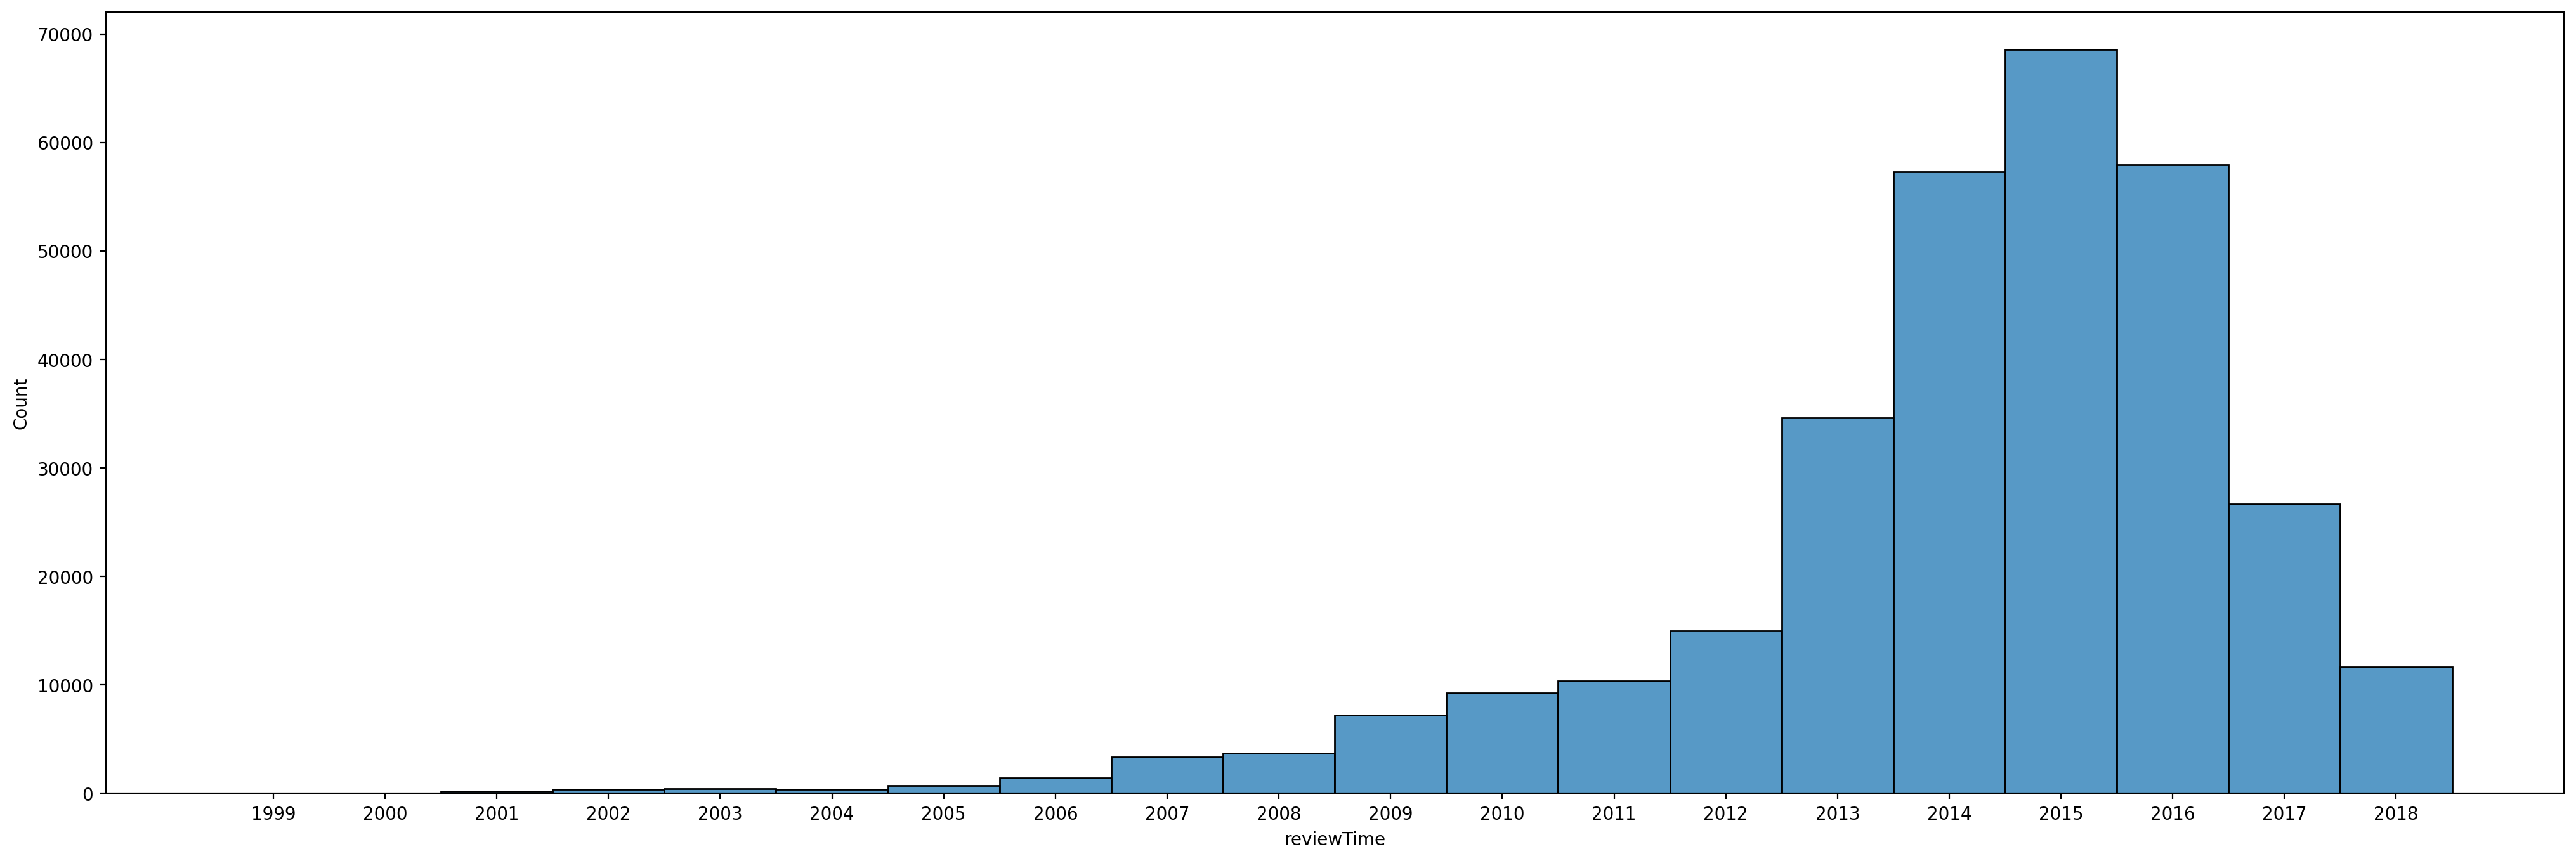

In [194]:
#Number of reviews over years, but histogram
fig,ax = plt.subplots(figsize =(25, 8))
sns.histplot(data = df_review, x = df_review["reviewTime"].sort_values(ascending=True), bins = 30,)

<AxesSubplot:xlabel='overall', ylabel='vote'>

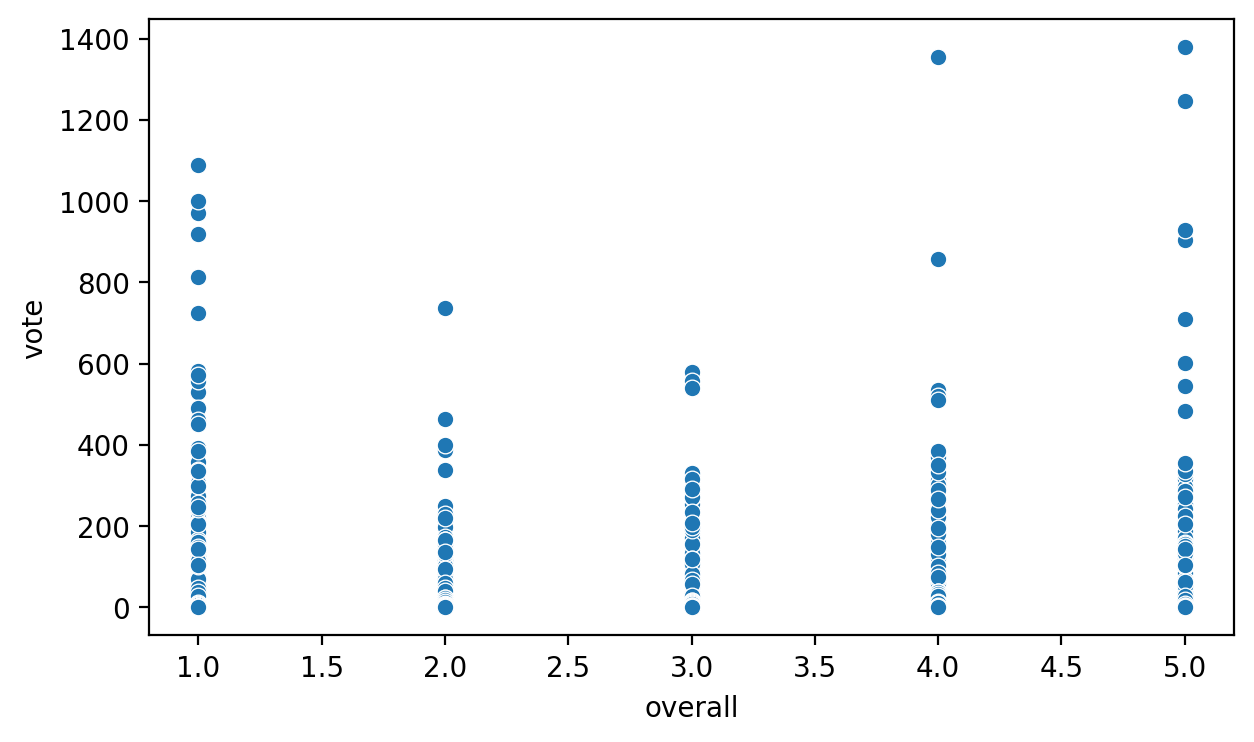

In [206]:
#The amount of votes in a year, if the rectangle is darker then that means there are more of that data point there
#i.e. 2015 has the most reviews with 0 votes than other years

fig,ax = plt.subplots(figsize =(7, 4))
sns.scatterplot(data = df_review, x = df_review["overall"], y = df_review["vote"])

In [189]:
s = df_review['reviewTime'].value_counts().sort_index()

Text(0, 0.5, 'amount of reviews')

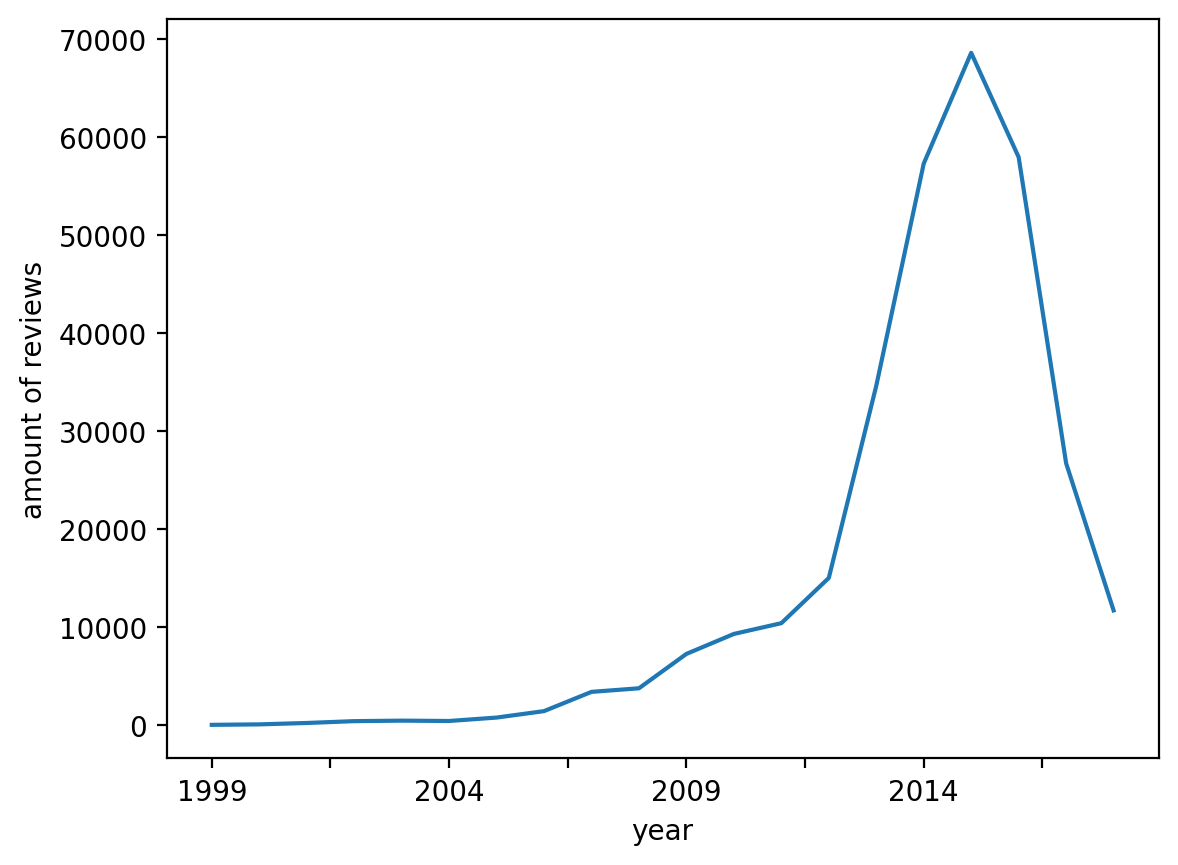

In [180]:
#The amount of reviews over a set amount of years 1998 - 2018

fig, main_ax = plt.subplots()
s.plot()
main_ax.set_xlabel('year')
main_ax.set_ylabel('amount of reviews')

<AxesSubplot:xlabel='reviewTime'>

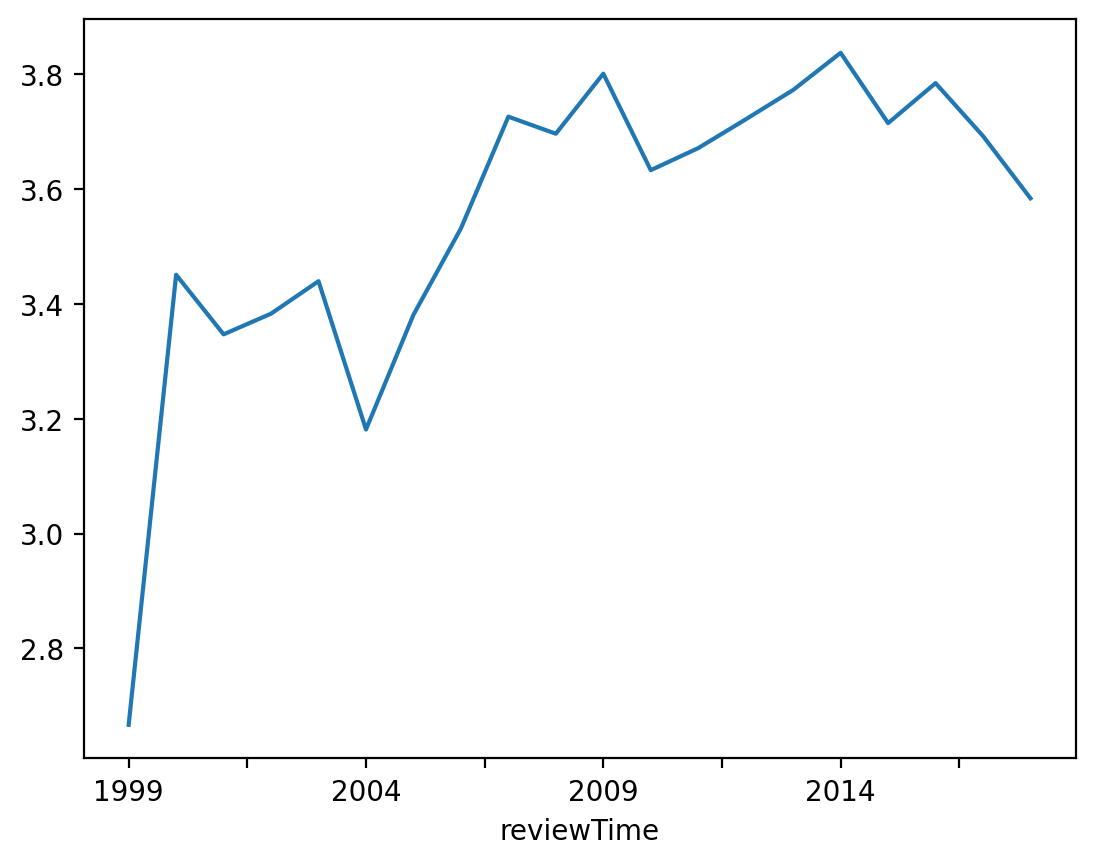

In [181]:
#The average rating of reviews in a single year

df_review.groupby(df_review['reviewTime'])['overall'].mean().plot()

In [182]:
df_review = pd.DataFrame.from_dict(review_data)

df_review = df_review[df_review['verified']==True][["reviewTime", "reviewText"]]
df_review["reviewTime"] = pd.to_datetime(df_review["reviewTime"], format="%m %d, %Y")
df_review["reviewTime"] = df_review["reviewTime"].dt.strftime('%Y')
df_review["reviewText"] = (df_review["reviewText"]).str.len()
df_review.sort_values(by=['reviewTime'], ascending=True)

,reviewTime,reviewText
368643,1999,438.0
367845,1999,1875.0
3332,1999,821.0
413241,2000,156.0
368396,2000,56.0
...,...,...
446867,2018,66.0
446868,2018,44.0
446869,2018,220.0
446856,2018,299.0


<AxesSubplot:xlabel='reviewTime'>

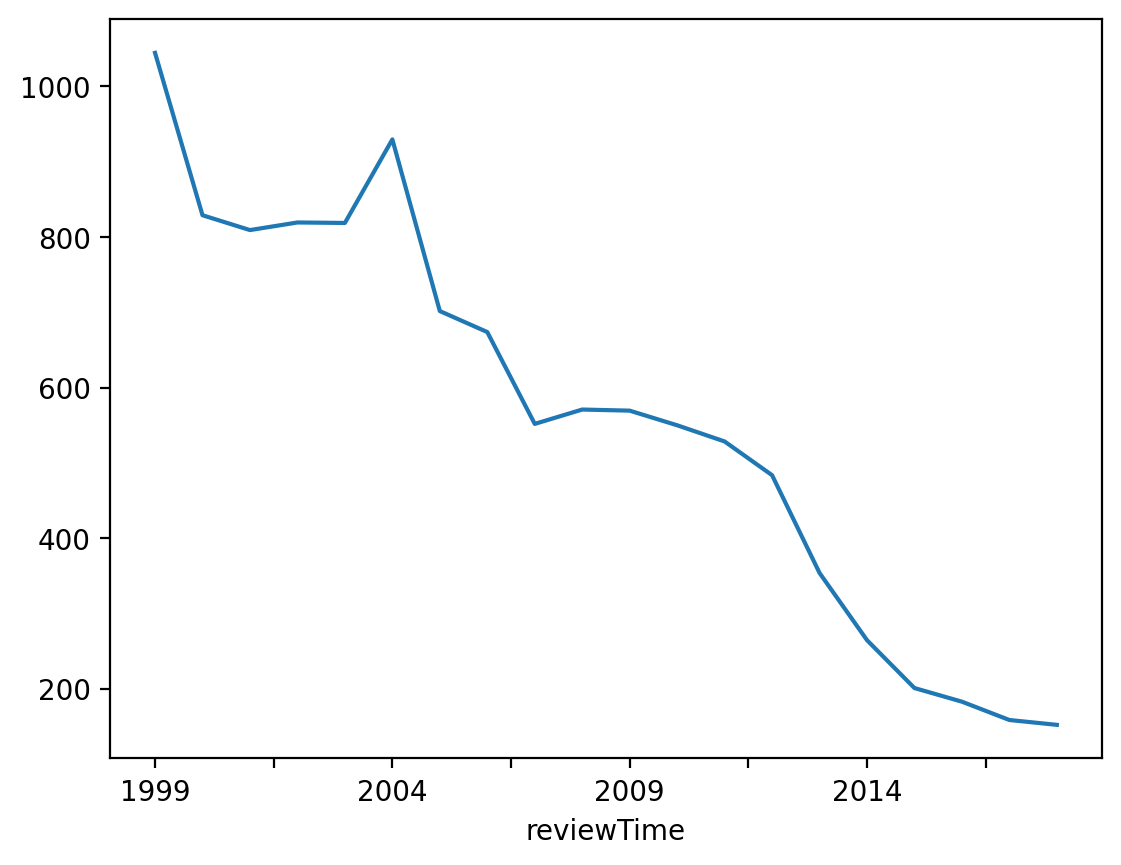

In [183]:
#The average length of a review over years
#1998 only has 3 reviews
#Length based on characters

df_review.groupby(df_review['reviewTime'])['reviewText'].mean().plot()